[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

#Final - Pregunta 1
##Nombre: Jhamil Crespo Rejas
##Carrera: Ingenieria en Ciencias de la Computacion


#Aprendizaje No Supervizado

##Importacion de Librerias

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os # modulo para interactuar con el sistema operativo (lextura y escritura de archivos)
import numpy as np #Cálculo científico y vectorial para python
import pandas as pd #para la manipulacion y analisis de datos
from sklearn.model_selection import train_test_split # para dividir conjuntos de datos en entrenamiento y prueba
from sklearn.preprocessing import OrdinalEncoder #para codificar variables categoricas como numeros enteros
import matplotlib.pyplot as plt #para la creacion de graficos y visualizaciones
from sklearn.cluster import KMeans #para realizar el clustering para el aprendizaje no supervisado
from sklearn.metrics import silhouette_score
ordinal_encoder = OrdinalEncoder()


##Preprocesamiento del Dataset

In [4]:
#Lectura del dataset
url = "/content/gdrive/MyDrive/Final - IA/Pregunta 1/dataset_9.csv"
dataframe = pd.read_csv(url)
print(dataframe)

         0    1    2    3    4    5    6    7    8    9  ...  3062  3063  \
0      224   18  185  224   18  185  224   18  185  224  ...   255   255   
1       23   29  127   23   29  127   23   29  127   23  ...   255   255   
2      177   52   87  177   52   87  177   52   87  177  ...   255   255   
3      255  255  255  255  255  255  255  255  255  255  ...   255   255   
4      255  255  255  255  255  255  255  255  255  255  ...   255   255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
49995   14  139    1   14  139    1   14  139    1   14  ...   255   255   
49996  255  255  255  255  255  255  255  255  255  255  ...   255   255   
49997   96   95  192   96   95  192   96   95  192   96  ...   255   255   
49998    3    7   55    3    7   55    3    7   55    3  ...   255   255   
49999  105   24  157  105   24  157  105   24  157  105  ...   255   255   

       3064  3065  3066  3067  3068  3069  3070  3071  
0       255   255   255   255  

In [5]:
#eliminamos las filas con valores nulos
dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

0       0
1       0
2       0
3       0
4       0
       ..
3067    0
3068    0
3069    0
3070    0
3071    0
Length: 3072, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,175.702660,175.596080,175.313620,176.208600,176.136500,175.918720,178.864040,178.583100,178.498000,183.829400,...,254.989960,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
std,85.077589,84.884936,84.927898,85.163852,84.902141,84.879278,84.852085,84.717465,84.628427,84.162078,...,1.314372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.000000,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
25%,103.000000,103.000000,102.000000,103.000000,103.000000,103.000000,107.000000,107.000000,106.000000,114.000000,...,255.000000,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
50%,206.000000,205.000000,204.000000,207.000000,206.000000,206.000000,214.000000,213.000000,213.000000,229.000000,...,255.000000,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [6]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=1)

In [7]:
print(len(X_train))

print(len(X_test))


40000
10000


In [8]:
X_Np = X_train.values[:100]
print(X_Np)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [181  10  20 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [197 222 238 ... 255 255 255]
 [218  22  21 ... 255 255 255]]


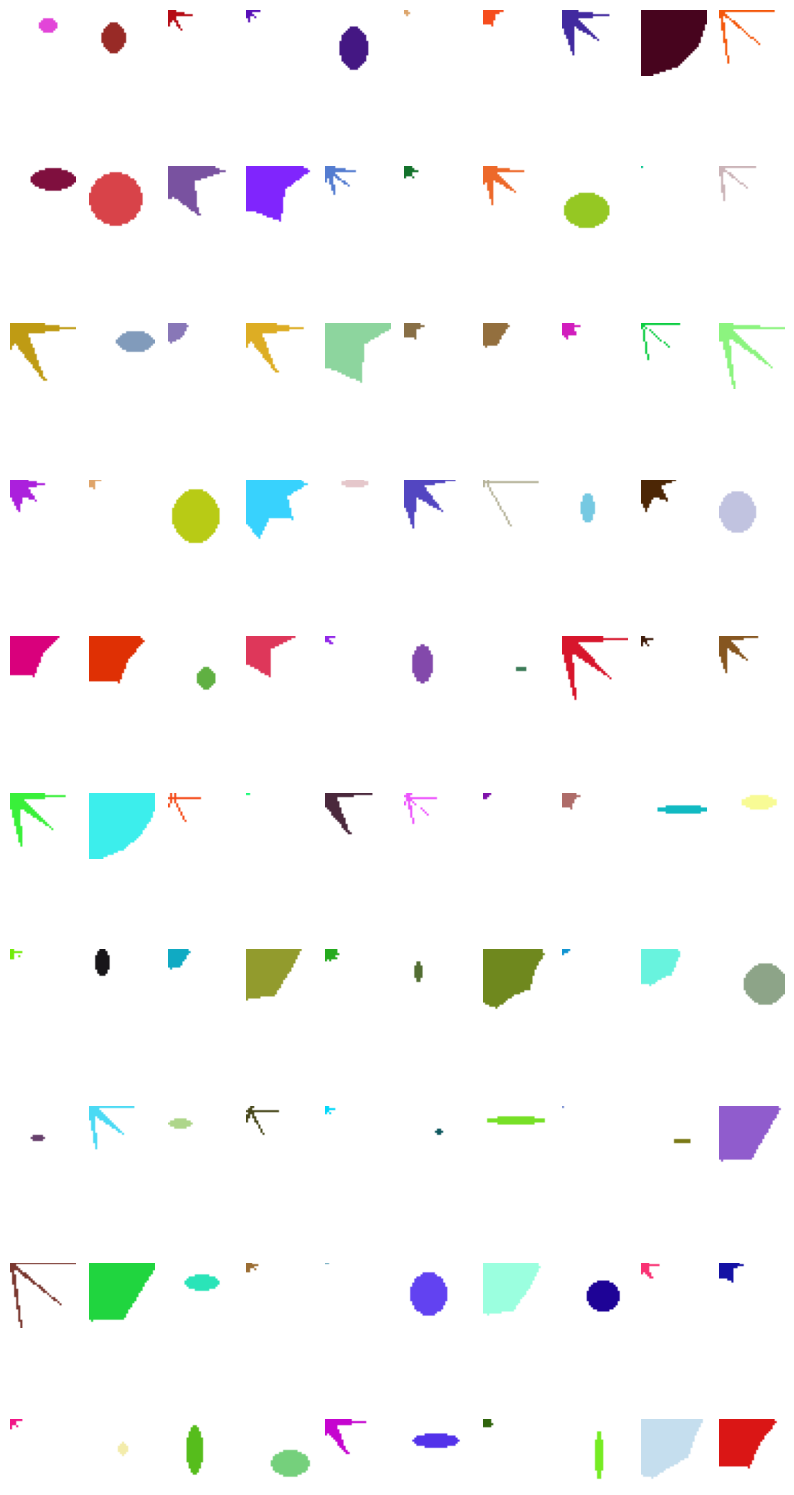

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))  # Increased figure height to accommodate more plots
for index, X_representative_digit in enumerate(X_Np[:100]): # Iterate through first 100 elements
  plt.subplot(10, 10, index+1)  # Adjusted subplot layout to 10 rows and 10 columns
  plt.imshow(X_representative_digit.reshape(32,32,3), cmap="binary")
  plt.axis('off')
plt.show()

##Clustering

###Analisis para escoger la mejor cantidad de grupos para realizar el clustering

Creamos 9 modelos K-means con diferentes cantidades de clusters (1 - 9) para encontrar el numero de clusters adecuado.

Este analisis lo hacemos en base a el coeficiente de silueta de los modelos que es un indicativo de cuan bien agrupados estan los datos. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Para el primer grafico utilizamos el coeficiente de silueta de todo el modelo

In [10]:
X_Np = X_train.values[0:10000]
X_trainNp = X_Np

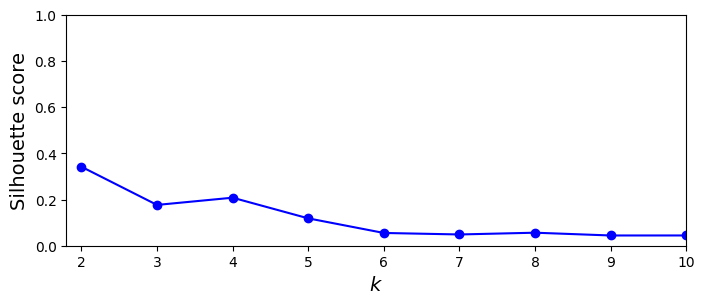

In [11]:
from sklearn.cluster import MiniBatchKMeans
# Seleccionar una muestra de los datos para reducir el tiempo de computo
sample_size = 10000  # Ajusta esto según tus recursos
sample_X = X_trainNp[np.random.choice(X_trainNp.shape[0], sample_size, replace=False)]

# Crear modelos MiniBatchKMeans
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, init="random", n_init=10, random_state=11).fit(sample_X)
                for k in range(2, 11)]

# Calcular los puntajes de silueta en la muestra de X
silhouette_scores = [silhouette_score(sample_X, model.labels_)
                     for model in kmeans_per_k]

# Graficar los puntajes de silueta
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 1])
plt.show()

Para el segundo grafico utilizamos el coeficiente de silueta de cada cluster en los modelos, eso nos ayuda a ver que tan equilibrados y estables estan los agrupamientos en los clusters de los modelos.

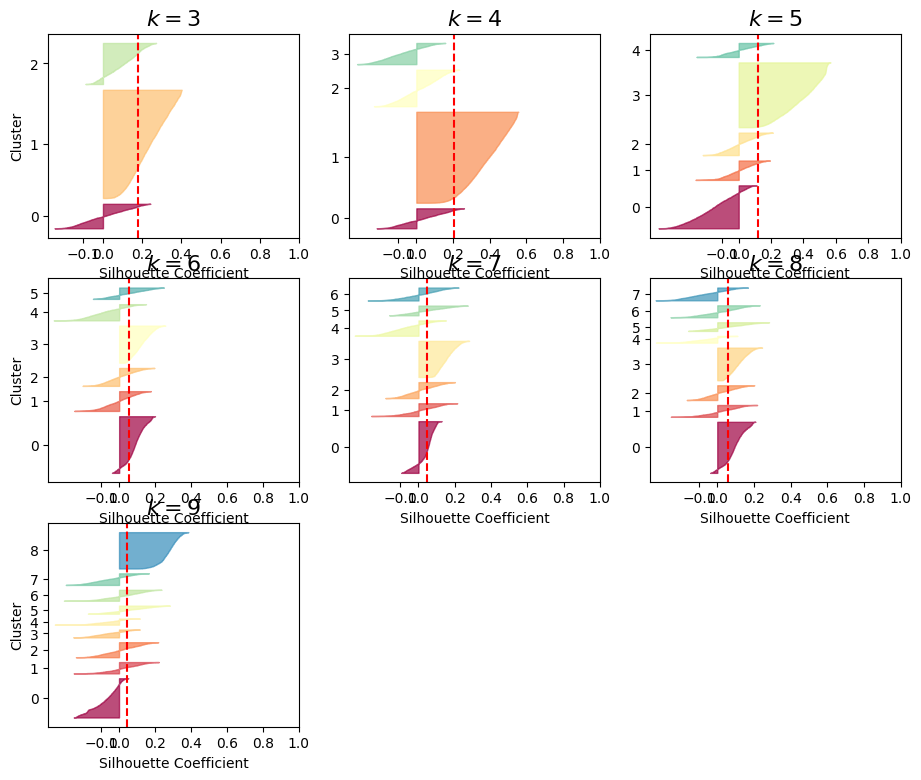

In [12]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Crear una figura de 11x9 pulgadas
plt.figure(figsize=(11, 9))

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in range(3, 10):  # se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1)  # crea un subgrafico para cada uno

    y_pred = kmeans_per_k[k - 2].labels_  # se obtienen las etiquetas (k-2 porque la lista comienza en k=2)
    silhouette_coefficients = silhouette_samples(sample_X, y_pred)  # se calculan los coeficientes de las siluetas para cada muestra

    padding = len(sample_X) // 30  # se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = []  # cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]  # se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort()  # se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)  # se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)  # se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)  # se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding  # se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (3,4, 5, 6, 7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")  # se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


Segun el analisis de las graficas, identificamos que el modelo con 7 clusters es el mas adecuado ya es que parece tener mas equilibrado los coeficientes de silueta de sus clusters.

##Aprendizaje Semi-Supervizado

Para el aprendizaje semi-supervizado primero creamos un modelo de K-means para 100 clusters y ajustamos los datos en base a esos grupos.

In [ ]:
from sklearn.cluster import KMeans

k = 50 #establece el numero de clusters (grupos)
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


Una vez realizado el clustering, obtenemos los ejemplos mas representativos para cada uno de los clusters ademas de sus respectivas etiquetas verdaderas.

In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train.values[idxs]#devuleve las muestras mas representativas por cada columna

In [ ]:
representative_labels = kmeans.predict(X_representative_digits)
print(representative_labels)#mostramos el numero de cluster correspondiente a cada ejemplo mas representativo

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Realizamos la clasificacion manual para esos ejemplos mas representativos



Se realiza la etiquetacion manual


In [ ]:
etiquetasAMano = [6,1,1,1,1,1,2,1,1,1,1,1,1,2,4,1,6,1,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,1,1,1,6,7,2,1,3,1,1]#aca se realiza la la clasificacion manual en base a los grupos optimos
y_representative_digits = np.array(etiquetasAMano)#se reemplaza las etiquetas
print(etiquetasAMano)

[6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 10, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 7, 9, 2, 1, 3, 1, 1]


Segun las etiquetas mas representativas ya clasificadas manualmente hacemos una proparagacion en base a su etiqueta a todos los demas ejemplos de sus clusters.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]#se asigna la etiqueta representativa a todas las muestras que pertenecen al cluster i

##Aprendizaje Activo

Identificamos las muestras con las que el modelo tiene más dificultades para clasificar correctamente

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea un modelo de regresion logistica con one vs all
probas = log_reg3.predict_proba(X_train)#se obtienen las probabilidades de que las muestras que pertenezcan a cada clase posible
labels_ixs = np.argmax(probas, axis=1)#obtiene el indice de la probabilidad maxima (la clase mas probable) por cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])#se obtiene la probabilidad maxima de cada muestra
sorted_ixs = np.argsort(labels) #se ordenan los indices de las muestras por sus probabilidades en orden ascendente(las primeras seran las entradas con menores probabilidades maximas)
labels[sorted_ixs[:10]]#se muestran las 10 muestras con las menores probabilidades maximas

array([0.26656379, 0.26738366, 0.27291329, 0.28879708, 0.29177325,
       0.29836316, 0.29901443, 0.30027288, 0.30085524, 0.30252013])

In [ ]:
y_lowest = y_train.values[:][sorted_ixs[:k]] #aca se tendria que clasificar manualmente de nuevo
y_lowest

array([4, 3, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 3, 4, 4, 1, 5, 1, 2, 1, 5, 1,
       3, 2, 3, 4, 3, 0, 2, 4, 3, 1, 1, 4, 2, 1, 3, 3, 2, 3, 3, 1, 2, 4,
       4, 5, 3, 0, 3, 3, 2, 4, 1, 0, 3, 4, 1, 3, 2, 1, 2, 3, 1, 4, 3, 1,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0, 3, 3, 1, 4, 0, 2, 4,
       1, 1, 3, 2, 2, 3, 1, 4, 3, 2, 1, 3])

In [ ]:
y_train2 = y_train_propagated.copy()#copia las filas de las 'y' propagadas
y_train2[sorted_ixs[:k]] = y_lowest#reeemplaza las etquetas manualmente clasificadas en la anterior celda

In [ ]:
#entrenamos el ultimo modelo con las Y que ya pasaron por todo el proceso de aprendizaje semi-supervizado y activo
#se entrena con las etiquetas ya completamente procesadas
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
#log_reg5.score(X_test, y_test)

CPU times: user 17.1 s, sys: 8.79 s, total: 25.9 s
Wall time: 16.1 s


0.5538040260509177